In [23]:
import omicverse as ov
ov.plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.9, Tutorials: https://omicverse.readthedocs.io/


In [2]:
import json

def load_dict_from_json(filename):
    with open(filename, 'r') as file:
        dict_json = file.read()
        loaded_dict = json.loads(dict_json)  # Load the JSON format into a dictionary
    return loaded_dict

# Load each dictionary using the function
human_std = load_dict_from_json('../LTNN/data/human_std.json')
human_median = load_dict_from_json('../LTNN/data/human_median.json')
human_max = load_dict_from_json('../LTNN/data/human_max.json')
human_min = load_dict_from_json('../LTNN/data/human_min.json')
human_mean = load_dict_from_json('../LTNN/data/human_mean.json')

# Now you have the dictionaries loaded from the JSON files


In [16]:
from scipy import stats
human_max_pd=pd.DataFrame(index=human_max.keys())
for i in human_max.keys():
    human_max_test=[]
    mu_i=np.mean(human_max[i])
    sigma_i=np.std(human_max[i])
    count_i,bins_i=np.histogram(human_max[i],bins=100)
    y_i=stats.norm.pdf(bins_i, mu_i, sigma_i)
    for j in human_max.keys():
        mu_j=np.mean(human_max[j])
        sigma_j=np.std(human_max[j])
        count_j,bins_j=np.histogram(human_max[j],bins=100)
        y_j=stats.norm.pdf(bins_j, mu_j, sigma_j)
        human_max_test.append(stats.spearmanr(y_i,y_j)[0])
    human_max_pd[i]=human_max_test
human_max_pd.head()

,TS_Bladder,TS_Blood,TS_Bone_Marrow,TS_Eye,TS_Fat,TS_Heart,TS_Kidney,TS_Large_Intestine,TS_Liver,TS_Lung,...,TS_Prostate,TS_Salivary_Gland,TS_Skin,TS_Small_Intestine,TS_Spleen,TS_Thymus,TS_Tongue,TS_Trachea,TS_Uterus,TS_Vasculature
TS_Bladder,1.000000,0.982446,0.991043,0.958486,0.998614,0.991776,0.984450,0.945778,0.939068,0.970984,...,0.970006,0.998567,0.998614,0.917915,0.991043,0.975236,0.998567,0.975236,0.939068,0.970984
TS_Blood,0.982446,1.000000,0.998451,0.895923,0.971928,0.952615,0.937787,0.877997,0.868923,0.998404,...,0.913314,0.990751,0.971928,0.841654,0.998451,0.921724,0.990751,0.921724,0.868923,0.998404
TS_Bone_Marrow,0.991043,0.998451,1.000000,0.916680,0.983017,0.967094,0.954292,0.900128,0.891672,0.993803,...,0.932510,0.996669,0.983017,0.865976,1.000000,0.940070,0.996669,0.940070,0.891672,0.993803
TS_Eye,0.958486,0.895923,0.916680,1.000000,0.971171,0.985871,0.992790,0.998893,0.997566,0.872860,...,0.998847,0.943494,0.971171,0.990879,0.916680,0.997402,0.943494,0.997402,0.997566,0.872860
TS_Fat,0.998614,0.971928,0.983017,0.971171,1.000000,0.997041,0.992068,0.960163,0.954234,0.958066,...,0.980804,0.994455,1.000000,0.935143,0.983017,0.985020,0.994455,0.985020,0.954234,0.958066


In [17]:
import scanpy as sc
data_dict=dict(zip(human_max_pd.index,sc.pl.palettes.zeileis_28))

In [18]:
data_df = pd.DataFrame(data_dict.items(), columns=['index', 'Tissue'])
data_df=data_df.set_index(data_df.columns[0])

Text(0.5, 0.9, 'Max distribution Correlation')

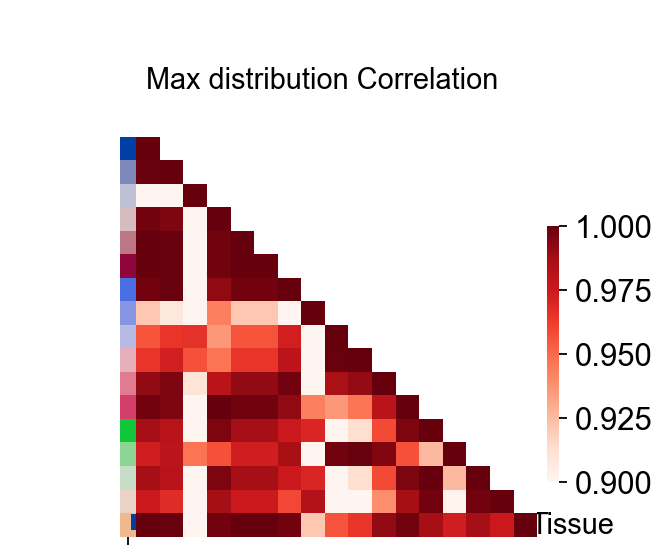

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
mask = np.array(human_max_pd)
mask[np.tril_indices_from(mask)] = False #下三角
g=sns.clustermap(human_max_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,vmax=1, vmin=0.9,col_cluster=False,row_cluster=False,
                 row_colors=data_df,col_colors=data_df
              )
g.fig.set_size_inches(4, 4)
g.ax_col_colors.set_position([0.20, 0.175, 0.6, 0.025]) 
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.cax.set_position([0.85, 0.25, 0.02, 0.4])  # Adjust the position as needed
g.ax_row_colors.xaxis.set_ticklabels([])
labels=g.ax_col_colors.yaxis.get_ticklabels()
plt.setp(labels, horizontalalignment='left',fontsize=13)
g.fig.suptitle('Max distribution Correlation',x=0.5,y=0.9,fontsize=13)
#plt.savefig("figures/fig_max_cor.png",dpi=300,bbox_inches = 'tight')
#plt.savefig("pdf/fig_max_cor.pdf",dpi=300,bbox_inches = 'tight')

In [4]:
import pandas as pd
df=pd.DataFrame(columns=['x','g'])
k=0
for i in human_std.keys():
    df1=pd.DataFrame()
    df1['x']=human_std[i]
    df1['g']=[j for j in [i.replace('TS_','')]*len(df1)]
    df1['x1']=[j for j in [k]*len(df1)]
    df1['x']=df1['x']+df1['x1']
    del df1['x1']
    df=pd.concat([df,df1])
    k+=0

import joypy
corr_feature = ['x','g']
corr_df = df[corr_feature]

['Trachea',
 'Salivary_Gland',
 'Small_Intestine',
 'Thymus',
 'Muscle',
 'Lymph_Node',
 'Uterus',
 'Kidney',
 'Tongue',
 'Heart',
 'Eye',
 'Fat',
 'Skin',
 'Spleen',
 'Liver',
 'Large_Intestine',
 'Pancreas',
 'Vasculature',
 'Prostate',
 'Mammary',
 'Bladder',
 'Lung',
 'Blood',
 'Bone_Marrow']

In [31]:
from scipy import stats
human_std_pd=pd.DataFrame(index=human_std.keys())
for i in human_std.keys():
    human_std_test=[]
    mu_i=np.mean(human_std[i])
    sigma_i=np.std(human_std[i])
    count_i,bins_i=np.histogram(human_std[i],bins=100)
    y_i=stats.norm.pdf(bins_i, mu_i, sigma_i)
    for j in human_std.keys():
        mu_j=np.mean(human_std[j])
        sigma_j=np.std(human_std[j])
        count_j,bins_j=np.histogram(human_std[j],bins=100)
        y_j=stats.norm.pdf(bins_j, mu_j, sigma_j)
        human_std_test.append(stats.spearmanr(y_i,y_j)[0])
    human_std_pd[i]=human_std_test
human_std_pd.head()

,TS_Bladder,TS_Blood,TS_Bone_Marrow,TS_Eye,TS_Fat,TS_Heart,TS_Kidney,TS_Large_Intestine,TS_Liver,TS_Lung,...,TS_Prostate,TS_Salivary_Gland,TS_Skin,TS_Small_Intestine,TS_Spleen,TS_Thymus,TS_Tongue,TS_Trachea,TS_Uterus,TS_Vasculature
TS_Bladder,1.000000,0.998008,0.999348,0.999907,0.998556,0.995574,0.999185,0.998556,0.999639,0.999685,...,0.998928,0.999639,0.999907,0.999639,0.999918,0.998556,0.999185,0.999907,0.999185,0.997740
TS_Blood,0.998008,1.000000,0.999499,0.997286,0.994467,0.990612,0.995515,0.994467,0.996459,0.999115,...,0.999779,0.996459,0.997286,0.996459,0.998614,0.994467,0.995515,0.997286,0.995515,0.993302
TS_Bone_Marrow,0.999348,0.999499,1.000000,0.998835,0.996436,0.992720,0.997379,0.996436,0.998183,0.999930,...,0.999930,0.998183,0.998835,0.998183,0.999709,0.996436,0.997379,0.998835,0.997379,0.995341
TS_Eye,0.999907,0.997286,0.998835,1.000000,0.999138,0.996540,0.999616,0.999138,0.999907,0.999289,...,0.998323,0.999907,1.000000,0.999907,0.999662,0.999138,0.999616,1.000000,0.999616,0.998462
TS_Fat,0.998556,0.994467,0.996436,0.999138,1.000000,0.998975,0.999895,1.000000,0.999592,0.997169,...,0.995713,0.999592,0.999138,0.999592,0.997892,1.000000,0.999895,0.999138,0.999895,0.999884


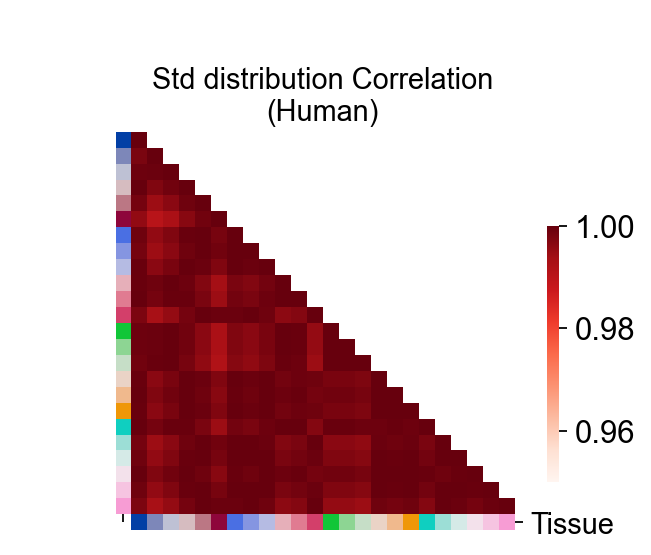

In [39]:
import scanpy as sc
data_dict=dict(zip(human_std_pd.index.tolist(),sc.pl.palettes.zeileis_28))
data_df = pd.DataFrame(data_dict.items(), columns=['index', 'Tissue'])
data_df=data_df.set_index(data_df.columns[0])

g=sns.clustermap(human_std_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,vmax=1, vmin=0.95,col_cluster=False,row_cluster=False,
                 row_colors=data_df,col_colors=data_df
              )
g.fig.set_size_inches(4, 4)
g.ax_col_colors.set_position([0.20, 0.175, 0.6, 0.025]) 
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.cax.set_position([0.85, 0.25, 0.02, 0.4])  # Adjust the position as needed
g.ax_row_colors.xaxis.set_ticklabels([])
labels=g.ax_col_colors.yaxis.get_ticklabels()
plt.setp(labels, horizontalalignment='left',fontsize=13)
g.fig.suptitle('Std distribution Correlation\n(Human)',x=0.5,y=0.9,fontsize=13)
plt.savefig("figures/fig1/fig_std_cor_human.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig1/fig_std_cor_human.pdf",dpi=300,bbox_inches = 'tight')

In [8]:
import scipy.stats
organ_name=list(set(corr_df['g']))
kl_pd=pd.DataFrame(index=organ_name,columns=organ_name)
for o1 in organ_name:
    for o2 in organ_name:
        p=corr_df.loc[corr_df['g']==o1,'x'].values
        q=corr_df.loc[corr_df['g']==o2,'x'].values
        kl_pd.loc[o1,o2]=scipy.stats.ks_2samp(p, q, 
                                               alternative='two-sided', mode='auto')[0]
        
for o1 in organ_name:
    kl_pd[o1]=kl_pd[o1].astype(float)

In [43]:
kl_pd=kl_pd.loc[[i.replace('TS_','') for i in human_std_pd.index.tolist()],
         [i.replace('TS_','') for i in human_std_pd.index.tolist()]]

In [44]:
import scanpy as sc
data_dict=dict(zip(kl_pd.index.tolist(),sc.pl.palettes.zeileis_28))

In [45]:
data_df = pd.DataFrame(data_dict.items(), columns=['index', 'Tissue'])
data_df=data_df.set_index(data_df.columns[0])

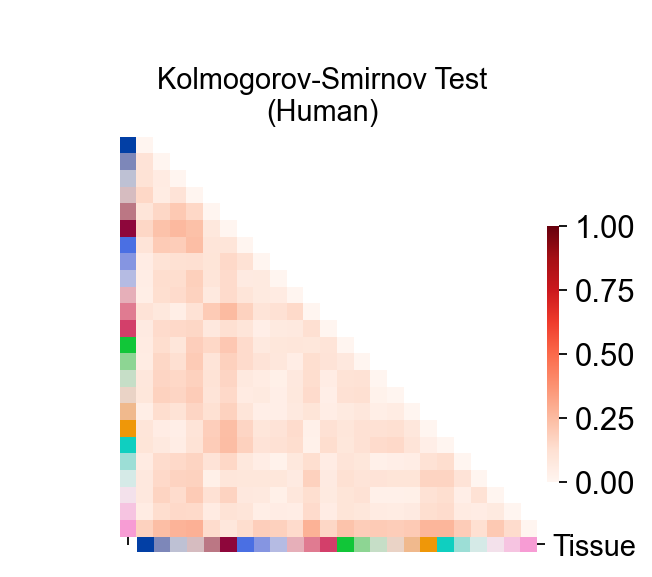

In [57]:
import seaborn as sns
mask = np.array(kl_pd)
mask[np.tril_indices_from(mask)] = False #下三角
g=sns.clustermap(kl_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,col_cluster=False,row_cluster=False,vmax=1,
                 row_colors=data_df,col_colors=data_df
              )
g.fig.set_size_inches(4, 4)
g.ax_col_colors.set_position([0.21, 0.14, 0.625, 0.025]) 
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.cax.set_position([0.85, 0.25, 0.02, 0.4])  # Adjust the position as neededg.ax_row_colors.xaxis.set_ticklabels([])
labels=g.ax_col_colors.yaxis.get_ticklabels()
g.ax_row_colors.xaxis.set_ticklabels([])
plt.setp(labels, horizontalalignment='left',fontsize=13)
g.fig.suptitle('Kolmogorov-Smirnov Test\n(Human)',x=0.5,y=0.9,fontsize=13)
plt.savefig("figures/fig1/fig_ks_2samp_human.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig1/fig_ks_2samp_human.pdf",dpi=300,bbox_inches = 'tight')

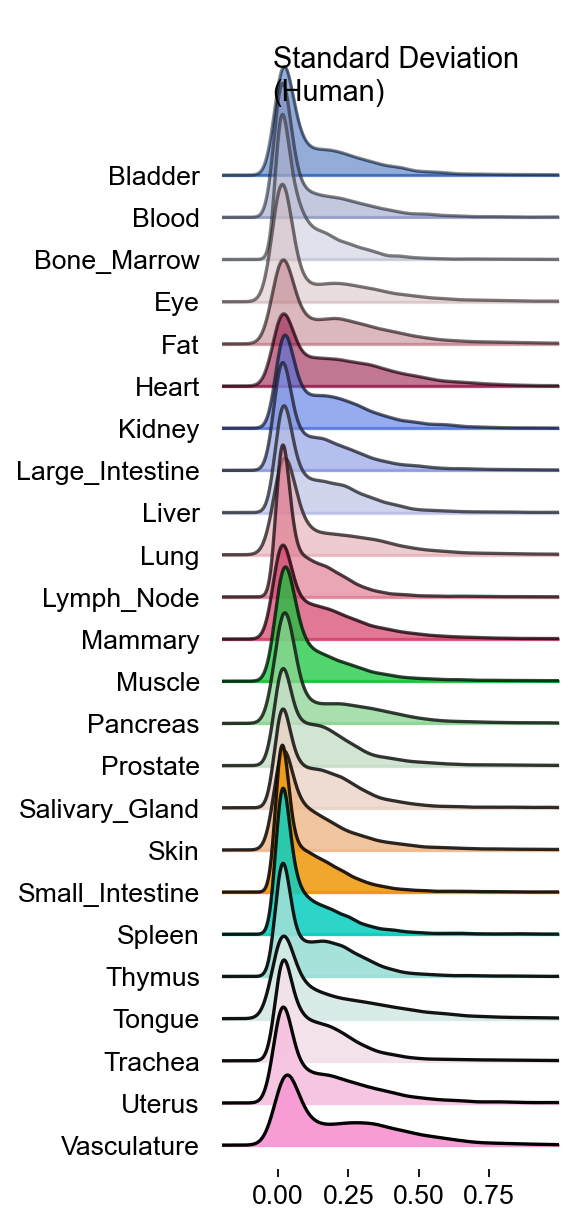

In [66]:
df=pd.DataFrame(columns=['x','g'])
k=0
for i in human_std.keys():
  df1=pd.DataFrame()
  df1['x']=human_std[i]
  df1['g']=[j for j in [i.replace('TS_','')]*len(df1)]
  df1['x1']=[j for j in [k]*len(df1)]
  df1['x']=df1['x']+df1['x1']
  del df1['x1']
  df=pd.concat([df,df1])
  k+=0

import joypy
corr_feature = ['x','g']
corr_df = df[corr_feature]
fig, axes = joypy.joyplot(corr_df,column = 'x', by='g', figsize=(4,8),x_range=[-0.2,1],
                          fill=True, fade=True,color=sc.pl.palettes.zeileis_28)
plt.suptitle('Standard Deviation\n(Human)',fontsize=13,y=0.95,horizontalalignment='left') 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for ax in axes:
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)

plt.savefig("figures/fig1/fig_std_distri_human.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig1/fig_std_distri_human.pdf",dpi=300,bbox_inches = 'tight')

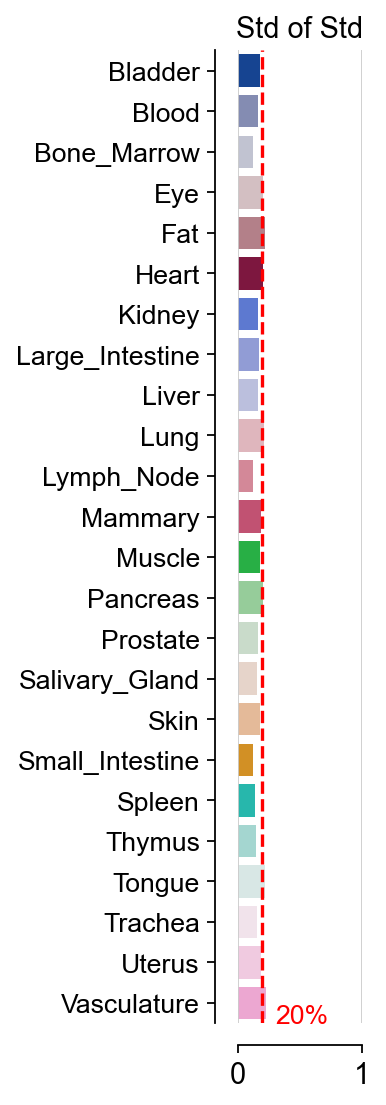

In [69]:
#定义图片大小
pp=plt.figure(figsize=(1,8))
#用ax控制图片
ax=pp.add_subplot(1,1,1)
x = [i.replace('TS_','') for i in list(human_std.keys())]
y1=[]
for i in human_std.keys():
    y1.append(np.std(human_std[i]))
sns.barplot(x=y1, y=x,ax=ax,palette=sc.pl.palettes.zeileis_28)
# 设置左边和下边的坐标轴线为独立的线段
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xlim(0,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.axvline(x=0.2, color='r', linestyle='--')
ax.text(0.3,len(human_std.keys())-0.5,'20%',fontsize=12,color='r')


plt.title('Std of Std',fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=13)

plt.savefig("figures/fig1/fig_std_std_human.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig1/fig_std_std_human.pdf",dpi=300,bbox_inches = 'tight')